# Network partitioning
---

## Imports
---

In [13]:
import networkx as nx
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import math
#from itertools import groupby
#from operator import itemgetter
import osmnx as ox
import geopandas as gpd 

%matplotlib inline

## Data
---

In [3]:
polygon1 = gpd.read_file("shp_files/polygons/polygon1.shp")

In [4]:
polygon2 = gpd.read_file("shp_files/polygons/polygon2.shp")

In [16]:
gdf = gpd.pd.concat([polygon1, polygon2])

In [24]:
#ofer_network = nx.read_shp("shp_files/StreetNetwork/", geom_attrs=True)

In [27]:
ofer_network = gpd.read_file("shp_files/StreetNetwork")

In [34]:
ofer_network.to_crs('WSG84')

ValueError: Cannot transform naive geometries.  Please set a crs on the object first.

In [32]:
type(ofer_network)

geopandas.geodataframe.GeoDataFrame

In [33]:
ofer_network.clip(gdf)


C:\ANACONDA3\envs\ox\lib\site-packages\geopandas\geodataframe.py:2244: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:2039

  return geopandas.clip(self, mask=mask, keep_geom_type=keep_geom_type)


,u,v,length,geometry
258,175,178,370.170217,"LINESTRING (178991.477 663104.397, 179022.723 ..."
187,121,146,426.413615,"LINESTRING (178793.422 663107.833, 178860.743 ..."
4,3,5,36.530457,"LINESTRING (178496.071 662917.715, 178500.044 ..."
177,113,154,182.143690,"LINESTRING (178750.413 662910.888, 178931.590 ..."
94,57,73,47.208744,"LINESTRING (178591.590 662919.467, 178626.224 ..."
...,...,...,...,...
56,30,62,39.394608,"LINESTRING (178351.822 663070.318, 178314.696 ..."
55,30,31,40.689381,LINESTRING EMPTY
24,12,31,40.162486,"LINESTRING (178428.815 663094.946, 178351.822 ..."
25,13,14,45.694457,"LINESTRING (178428.815 663094.946, 178471.060 ..."


In [28]:
list(ofer_network.nodes(data=True))[0:2]

AttributeError: 'GeoDataFrame' object has no attribute 'nodes'

In [26]:
pos = [i for i in ofer_network]

In [9]:
locations = dict(zip(list(ofer_network.nodes()), pos))
nx.set_node_attributes(ofer_network, locations, 'pos')

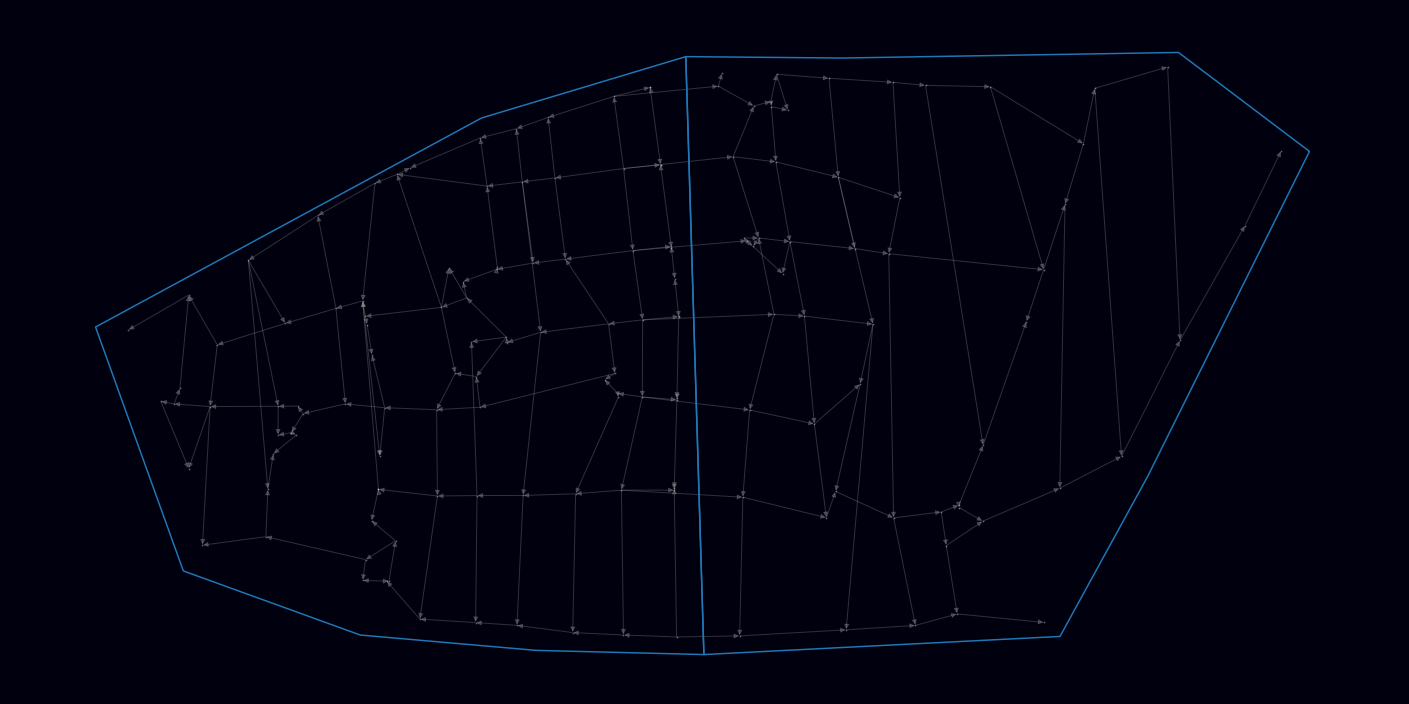

In [10]:
fig, ax = plt.subplots(figsize=(25, 25))

pos=nx.get_node_attributes(ofer_network,'pos')
nx.draw(ofer_network, pos, node_size=1, node_color='white', edge_color='silver', alpha = 0.25)
gdf.boundary.plot(ax=ax)
fig.set_facecolor("#00000F")
plt.show()

In [23]:
ofer_network

In [11]:
ofer_network = nx.MultiDiGraph(ofer_network)

In [123]:
nodes = nodes.to_crs("WGS84") 

ValueError: Cannot transform naive geometries.  Please set a crs on the object first.

In [12]:
nodes = ox.graph_to_gdfs(ofer_network, edges=False)

NameError: name 'ox' is not defined

In [ ]:
i = 0
for index, polygon in gdf.iterrows():
    intersecting_nodes = nodes[nodes.intersects(polygon['geometry'])].index
    G_sub = G.subgraph(intersecting_nodes)
    key = polygon['lsoa11nm']
    if len(G_sub) > 0:
        subgraphs[key] = G_sub
        #fig, ax = ox.plot_graph(G_sub)
    else:
        subgraphs[key] = nx.adjacency_matrix(subgraphs[key]).todense()